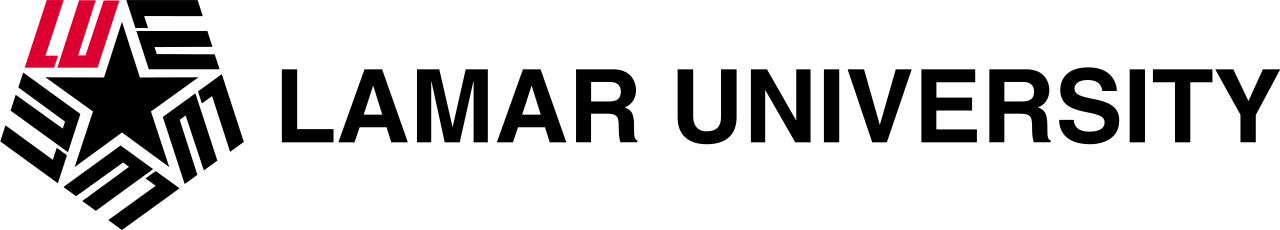

<h1><center>Python Assignment</center></h1>

<h4>Nimesh Dhameliya</h4>

<h4>Avinash Sai Anumolu</h4>

<h4>Madhu Gojjala</h4>

<h2>Problem Statement</h2>
<h3>Find out area of Agricultural land in Texas</h3>

In [1]:
#import library
import os
import matplotlib.pyplot as plt
import numpy as np
import gdal

In [2]:
#define path 
os.chdir('C:/Users/avina/Downloads/nlcd19_48_lc')

In [3]:
#import file
img = gdal.Open('nlcd_2019_land_cover_l48_20210604_TX.img')

In [4]:
#get metadata using band 1 
iband = img.GetRasterBand(1)

In [5]:
#extract data 
data = iband.ReadAsArray()
data

array([[-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       ...,
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128]], dtype=int8)

In [6]:
#get unique pixel value from data and its count
unique_no = np.unique(data, return_counts=True)
unique_no

(array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
          52,   71,   81,   82,   90,   95], dtype=int8),
 array([1056888156,      25309,   15573948,   18541073,   13047785,
           9949312,    4068238,    2544742,   20376221,   43194921,
          16010402,  314749431,  110764265,   75432950,   94867328,
          21397702,    8488257], dtype=int64))

In [7]:
#find index no of cultivable land 
index = np.where((unique_no[0] == 81) | (unique_no[0] == 82))
index

(array([13, 14], dtype=int64),)

In [8]:
#using index, pixel counts for cultivable land
pi = unique_no[1][13] + unique_no[1][14]
pi

170300278

<h4>Area</h4>

In [9]:
#1 square meter = 3.86 * 10e-7 square mile
Area = pi * 30 * 30  #square meter
Area

153270250200

In [26]:
Area_mile2 = Area * 3.86 * 1e-7
Area_mile2    #square mile

59162.3165772

In [20]:
area_all = []
for n in y:
    result = n * 900 * 3.8610 * 1e-7
    area_all.append(result)

In [21]:
area_all

[5411.79119052,
 6442.83745677,
 4533.97480965,
 3457.2864268800004,
 1413.67202262,
 884.2723975800001,
 7080.533035290001,
 15009.803098289998,
 5563.45459098,
 109372.27977819,
 38489.47444485,
 26212.1957955,
 32965.447806719996,
 7435.48746798,
 2949.5844249300003]

In [23]:
texas_area = sum(area_all)
texas_area   #square mile

267222.09474675

<h4>Plot</h4>

In [18]:
x = unique_no[0][2:17].tolist()
y = unique_no[1][2:17].tolist()

In [19]:
x
y

[15573948,
 18541073,
 13047785,
 9949312,
 4068238,
 2544742,
 20376221,
 43194921,
 16010402,
 314749431,
 110764265,
 75432950,
 94867328,
 21397702,
 8488257]

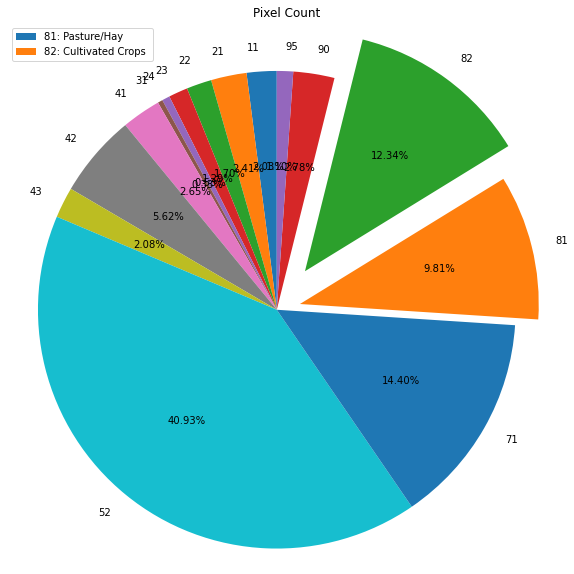

In [13]:
x1=['81: Pasture/Hay','82: Cultivated Crops ']
explode = [0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0,0]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(y,explode=explode,labels=x,autopct='%1.2f%%',startangle=90)
ax.axis('equal')
plt.legend(labels=x1,loc='upper left')
plt.title('Pixel Count')
plt.show()

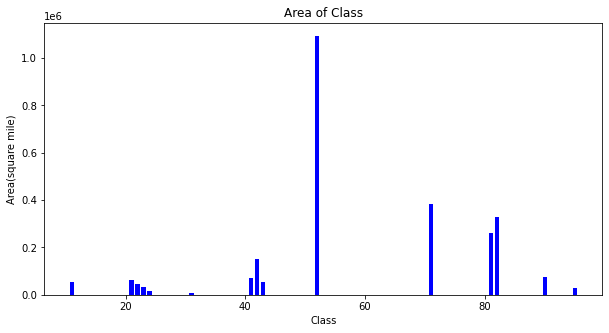

In [16]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, area_all, color ='b', width = 0.7)
plt.xlabel('Class')
plt.ylabel("Area(square mile)")
plt.title("Area of Class")
plt.show ()

In [28]:
per_cul_area = (Area_mile2/texas_area)*100
per_cul_area

22.139754810794717

<h4>Conclusion</h4>

<h4>The cultivable area of Texas is 329569.09 and pasture area is 262054.06 square mile.</h4>
<h4>The cultivated area is 22.13%</h4>